<a href="https://colab.research.google.com/github/olyvias/python/blob/main/Tugas10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

'Python 10'/   Untitled0.ipynb


In [ ]:
import os

import keras
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dropout, Activation, Dense
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from PIL import Image
from imutils import paths

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)

2.4.3


In [ ]:
base_dir = paths.list_images("/content/drive/My Drive/Colab Notebooks/Python 10")
labels = []

In [ ]:
for imagePath in base_dir:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [ ]:
base_model = MobileNet(weights='imagenet',include_top=False,input_shape=(128,128,3))
model = Sequential([base_model,  
                    GlobalAveragePooling2D(),                 
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
H = model.fit(trainX,
              trainY,
              validation_data=(testX, testY),
              steps_per_epoch=20,
              epochs=10,
              batch_size=16,
              verbose=1)

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 0.3976 - accuracy: 0.8781 - val_loss: 2.2786 - val_accuracy: 0.6540
Epoch 2/10
20/20 [==============================] - 23s 1s/step - loss: 0.3316 - accuracy: 0.9312 - val_loss: 1.9326 - val_accuracy: 0.7511
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.2645 - accuracy: 0.9486 - val_loss: 0.7704 - val_accuracy: 0.9030
Epoch 4/10
20/20 [==============================] - 23s 1s/step - loss: 0.3999 - accuracy: 0.9281 - val_loss: 0.2780 - val_accuracy: 0.9705
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.1361 - accuracy: 0.9678 - val_loss: 0.5957 - val_accuracy: 0.9325
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.0448 - accuracy: 0.9906 - val_loss: 0.5386 - val_accuracy: 0.9578
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 0.0988 - accuracy: 0.9646 - val_loss: 0.1500 - val_accuracy: 0.9916
Epoch 8/10
20/20 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


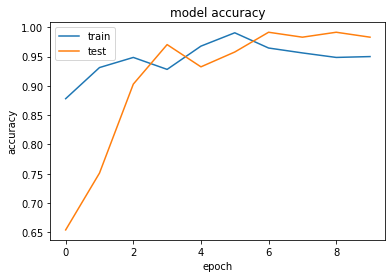

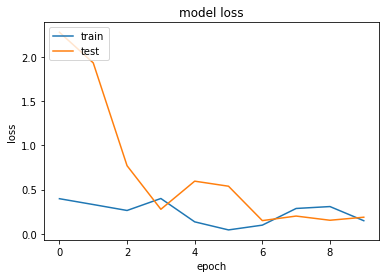

In [ ]:
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

       coast       0.99      0.98      0.98        93
      forest       0.99      0.98      0.98        83
     highway       0.97      1.00      0.98        61

    accuracy                           0.98       237
   macro avg       0.98      0.98      0.98       237
weighted avg       0.98      0.98      0.98       237



In [ ]:
sample='/content/drive/My Drive/Colab Notebooks/Python 10/forest/forest_art114.jpg'

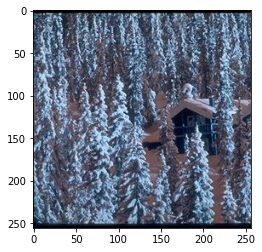

In [ ]:
img_array = cv2.imread(sample)
plt.imshow(img_array)
plt.show()

In [ ]:
image_testing = Image.open('/content/drive/My Drive/Colab Notebooks/Python 10/forest/forest_art114.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.5154018e-10 1.0000000e+00 6.2824459e-18]]
['forest']
